## By: Alex Sandoval

## Part 1 Neural Net Classification

1. Load emp.xlsx which contains the history of employees hired at our company over the last decade.
1. Perform appropriate EDA. Finish by providing a Markdown cell summarizing the insights acquired.
1. Prepare your data for a multilayered neural network.
1. Design and train a 3 layer deep neural network with Keras to classify employee "fit".
1. Use the history attribute of your model to plot the accuracy of your network with respect to epochs during training.
1. Evaluate and report the performance of your trained model.
1. Compare the performance to scikit-learns MLPClassifier. 

### Employee Data

- **survey** : a normalized score of employees happiness in their current job.
- **perf**: a measure of the employees performance averaged of the past several years.
- **projects**: a measure of experience; the number of special projects completed
- **promo**: has the employee been promoted within the company
- **experience**: duration (years) with the company
- **daily_hrs**: an average number of hours per day logged by the employee over the past several years.
- **train**: an average number of hours spent in job training over career
- **incidents**: total number of incidents/issues in the employees file
- **dept**:  the primary department in which the employee served
- **sal**: salary level
- **fit**: current employee status: 0 means left the company or was fired (bad fit).  1 means active employee (good fit).  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Here we initialize the data and do a quick check of it to began our EDA
dfE = pd.read_excel("emp.xlsx")
dfE.head()
#Looking at this I can see all the columns and what types of data they show

,survey,perf,projects,experience,promoted,dept,sal,daily_hrs,train,incidents,fit
0,0.69,0.88,3,10,0,management,medium,5.387648,21.588860,0,1
1,0.29,0.75,6,10,0,sales,medium,8.902760,21.744744,0,1
2,0.75,0.60,4,10,0,marketing,low,6.110381,18.613414,1,1
3,0.61,0.89,3,10,0,sales,high,7.950066,20.255789,0,1
4,0.47,0.79,3,10,0,sales,low,9.329829,20.654921,0,1


In [2]:
#Here we will get a description to further our understanding
dfE['fit'].describe()
#From these I learned lots of helpful statistical info about my data

count    14999.000000
mean         0.761917
std          0.425924
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: fit, dtype: float64

In [3]:
#Here we check for sker and kurt
print("Skewness %f " % dfE['fit'].skew())
print("Kurtosis %f " % dfE['fit'].kurt())

Skewness -1.230043 
Kurtosis -0.487060 


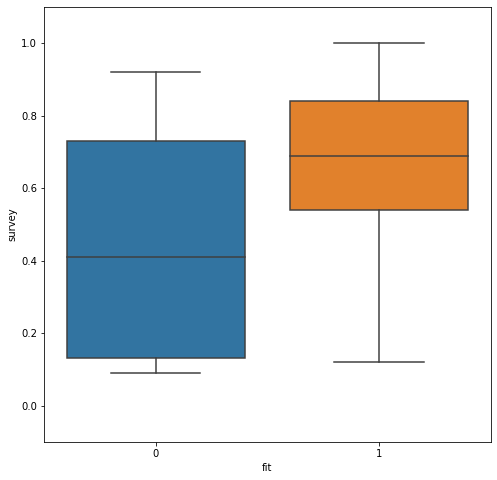

In [4]:
var = 'fit'
dt = pd.concat([dfE['survey'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="survey", data=dt)
fig.axis(ymin=-.1, ymax=1.1);

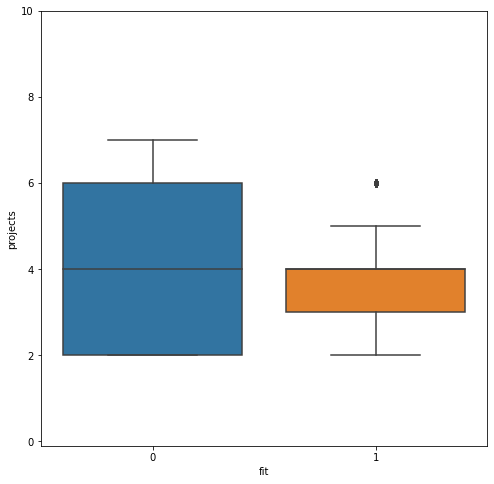

In [5]:
var = 'fit'
dt = pd.concat([dfE['projects'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="projects", data=dt)
fig.axis(ymin=-.1, ymax=10);

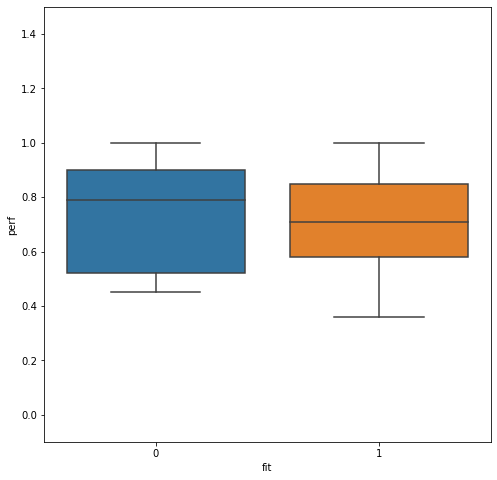

In [6]:
var = 'fit'
dt = pd.concat([dfE['perf'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="perf", data=dt)
fig.axis(ymin=-.1, ymax=1.5);

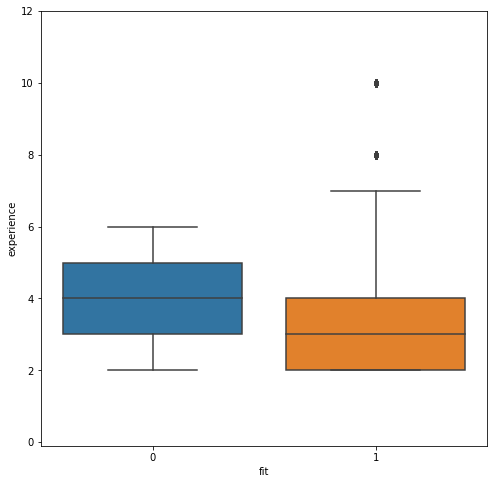

In [7]:
var = 'fit'
dt = pd.concat([dfE['experience'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="experience", data=dt)
fig.axis(ymin=-.1, ymax=12);

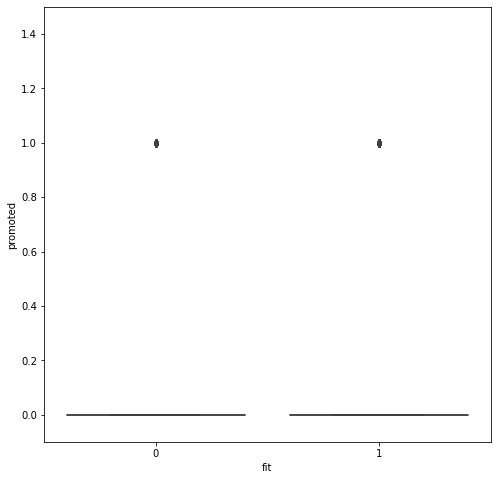

In [8]:
var = 'fit'
yin = 'promoted'
dt = pd.concat([dfE[yin], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y=yin , data=dt)
fig.axis(ymin=-.1, ymax=1.5);

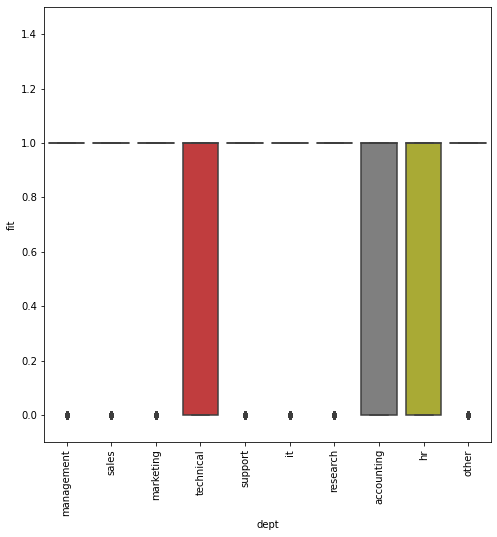

In [9]:
var = 'dept'
dt = pd.concat([dfE['fit'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="fit", data=dt)
fig.axis(ymin=-.1, ymax=1.5);
plt.xticks(rotation=90);
#Here we can see that certain departments fit much mroe than other ones

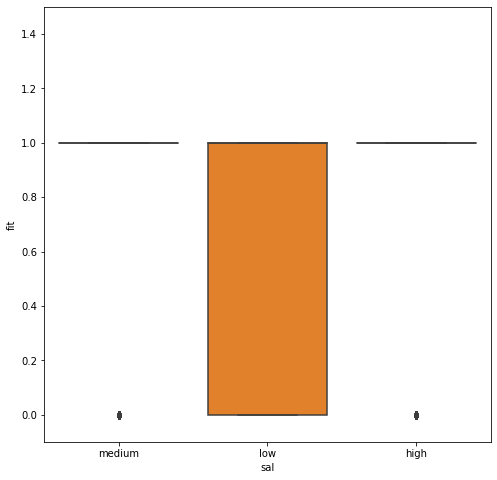

In [10]:
var = 'sal'
dt = pd.concat([dfE['fit'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="fit", data=dt)
fig.axis(ymin=-.1, ymax=1.5);
#Very strong relationship here aswell

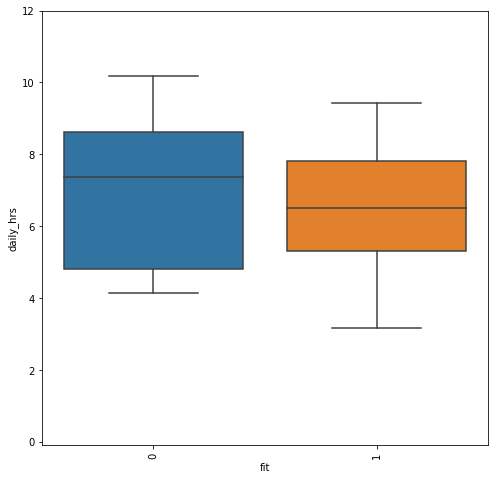

In [11]:
var = 'fit'
dt = pd.concat([dfE['daily_hrs'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="daily_hrs", data=dt)
fig.axis(ymin=-.1, ymax=12);
plt.xticks(rotation=90);

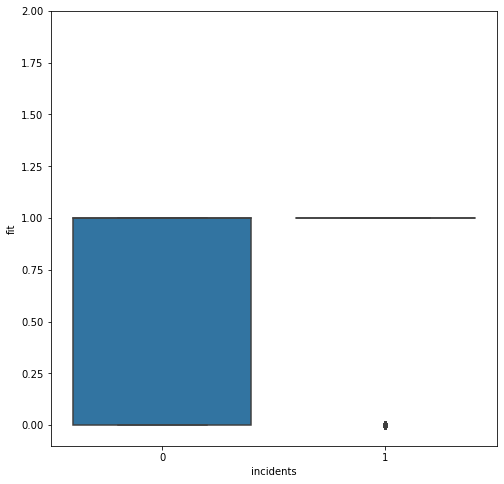

In [12]:
var = 'incidents'
dt = pd.concat([dfE['fit'], dfE[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="fit", data=dt)
fig.axis(ymin=-.1, ymax=2);
#VERY strong relationship here!


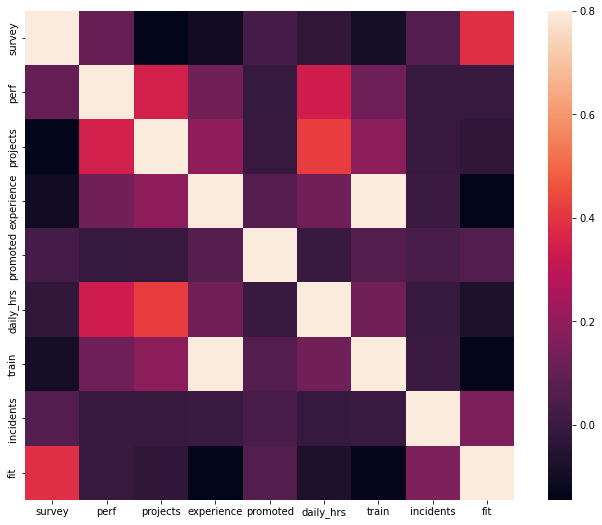

In [13]:
#Check for corrolation
heatMat = dfE.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(heatMat, vmax=.8, square=True);

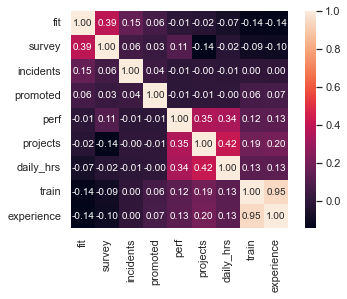

In [14]:
n = 10
col = heatMat.nlargest(n, 'fit')['fit'].index
fj = np.corrcoef(dfE[col].values.T)
sns.set(font_scale=1)
heat = sns.heatmap(fj, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=col.values, xticklabels=col.values)
plt.show()

### Observation

- From this heatmap, I've determined that train and experience are highly corrolated so I'll probably drop train from the dataset. I chose train to drop because I think it will be easier to work with an int than a float

- perf and daily hours are also similarly corrolated so I will choose one of them to delete as well. I'll drom daily hours because I think a double will be easier to work with than a float. It will at least be more visually pleasing.


In [15]:
df2 = dfE
df2 = df2.drop(['train', 'daily_hrs'], axis =1) 
df2

,survey,perf,projects,experience,promoted,dept,sal,incidents,fit
0,0.69,0.88,3,10,0,management,medium,0,1
1,0.29,0.75,6,10,0,sales,medium,0,1
2,0.75,0.60,4,10,0,marketing,low,1,1
3,0.61,0.89,3,10,0,sales,high,0,1
4,0.47,0.79,3,10,0,sales,low,0,1
...,...,...,...,...,...,...,...,...,...
14994,0.32,0.95,5,2,0,sales,low,0,0
14995,0.48,0.78,2,2,0,technical,medium,0,0
14996,0.80,0.75,3,2,0,sales,medium,0,0
14997,0.34,0.67,4,2,0,sales,low,0,0


<AxesSubplot:>

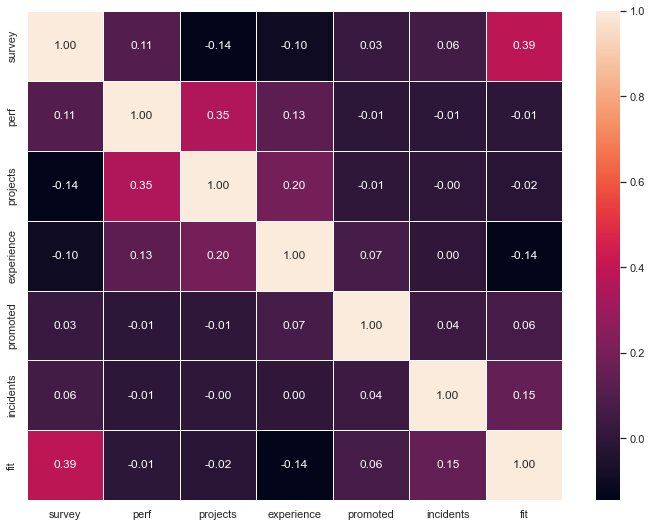

In [16]:

plt.subplots(figsize=(12,9))
sns.heatmap(df2.corr(),annot=True, fmt = '.2f', linewidths= 0.5)



### Further Refinment
- To further refine my data, I'll also be dropping "perf" because it doesn't give me as much information as the other columns 

In [17]:
df3  = df2.drop('perf', axis= 1)
df3

,survey,projects,experience,promoted,dept,sal,incidents,fit
0,0.69,3,10,0,management,medium,0,1
1,0.29,6,10,0,sales,medium,0,1
2,0.75,4,10,0,marketing,low,1,1
3,0.61,3,10,0,sales,high,0,1
4,0.47,3,10,0,sales,low,0,1
...,...,...,...,...,...,...,...,...
14994,0.32,5,2,0,sales,low,0,0
14995,0.48,2,2,0,technical,medium,0,0
14996,0.80,3,2,0,sales,medium,0,0
14997,0.34,4,2,0,sales,low,0,0


<AxesSubplot:>

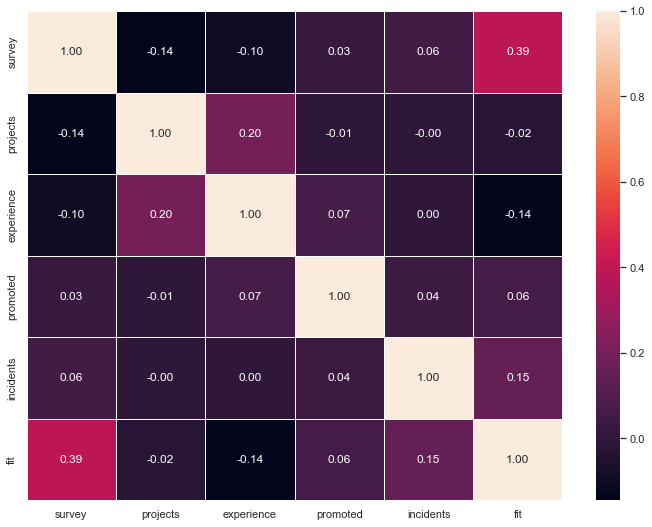

In [18]:
plt.subplots(figsize=(12,9))
sns.heatmap(df3.corr(),annot=True, fmt = '.2f', linewidths= 0.5)


In [19]:
from sklearn.model_selection import train_test_split

#Here I will do one hot encoding for my dataset
X= df3.drop('fit', axis=1)
y= df3['fit']

dum = pd.get_dummies(df3.dept, prefix='dept')
dumm = pd.get_dummies(df3.sal, prefix='sal')

X= X.drop('dept', axis =1)
X= X.drop('sal', axis =1)

#One hot encoding dept
X['dAccounting'] =dum['dept_accounting']
X['dHR'] =dum['dept_hr']
X['dIT'] =dum['dept_it']                
X['dManag'] =dum['dept_management']
X['dMarket'] =dum['dept_marketing']

#One hot encoding sal
X['sHigh'] =dumm['sal_high']
X['sLow'] =dumm['sal_low']
X['sMed'] =dumm['sal_medium']                

           
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.3)




In [20]:
trainX

,survey,projects,experience,promoted,incidents,dAccounting,dHR,dIT,dManag,dMarket,sHigh,sLow,sMed
5827,0.75,6,3,0,0,0,0,0,0,0,0,0,1
14622,0.61,4,2,0,0,0,0,0,1,0,0,0,1
6220,0.73,4,3,0,0,0,0,0,0,0,0,0,1
6297,0.93,4,3,0,0,0,0,0,0,0,0,1,0
8164,0.93,5,3,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14385,1.00,5,2,0,0,0,0,0,0,1,0,0,1
2586,0.85,5,5,0,0,0,0,0,1,0,0,0,1
11994,0.30,4,2,0,0,0,0,0,0,0,0,1,0
3616,0.91,4,4,0,0,0,0,0,0,0,0,0,1


In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor

size = len(trainX.columns)
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(size+1, activation='relu', input_shape=(size,)))

# Add one hidden layer 
model.add(Dense(int(size*.66), activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                196       
                                                                 
 dense_1 (Dense)             (None, 8)                 120       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [22]:
keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
logHistory = model.fit(trainX, trainY,epochs=20, batch_size=1, verbose=1)


Epoch 1/20
10499/10499 [==============================] - 18s 2ms/step - loss: 0.3517 - accuracy: 0.8356
Epoch 2/20
10499/10499 [==============================] - 16s 2ms/step - loss: 0.2623 - accuracy: 0.8917
Epoch 3/20
10499/10499 [==============================] - 18s 2ms/step - loss: 0.2434 - accuracy: 0.9020
Epoch 4/20
10499/10499 [==============================] - 17s 2ms/step - loss: 0.2261 - accuracy: 0.9105
Epoch 5/20
10499/10499 [==============================] - 17s 2ms/step - loss: 0.2108 - accuracy: 0.9211
Epoch 6/20
10499/10499 [==============================] - 18s 2ms/step - loss: 0.1999 - accuracy: 0.9239
Epoch 7/20
10499/10499 [==============================] - 16s 2ms/step - loss: 0.1966 - accuracy: 0.9263
Epoch 8/20
10499/10499 [==============================] - 16s 2ms/step - loss: 0.1941 - accuracy: 0.9274
Epoch 9/20
10499/10499 [==============================] - 17s 2ms/step - loss: 0.1911 - accuracy: 0.9286
Epoch 10/20
10499/10499 [==============================

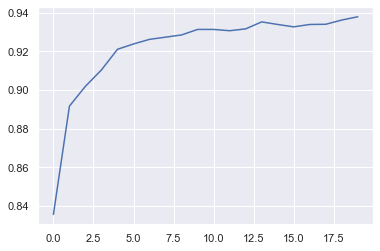

In [23]:
plt.plot(logHistory.history['accuracy'])
plt.show()


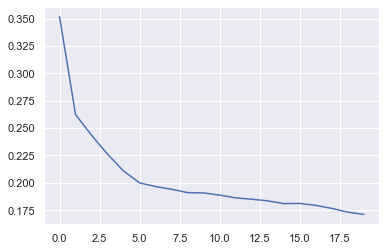

In [24]:
plt.plot(logHistory.history['loss'])
plt.show()


In [25]:
print(model.evaluate(testX, testY))

141/141 [==============================] - 1s 2ms/step - loss: 0.1776 - accuracy: 0.9411
[0.17755360901355743, 0.9411110877990723]


In [26]:
from sklearn.neural_network import MLPClassifier

clasif = MLPClassifier(max_iter=300).fit(trainX, trainY)
clasif.predict_proba(testX[:1])
clasif.score(testX, testY)

#Sklearn is slightly more accurate than mine, but they have been doing it longer.

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9502222222222222

## Part 2 Neural Net Regression 

Consider Bike Sharing Data provided in bike_data.xlsx described below.  

- **dteday**: date (not a good feature. uniquely identifies a row instance for convenience.)
- **season**: season of the year
- **yr**: year of data collection
- **mnth**: month of year
- **holiday**: federal holiday (1) or not (0)
- **weekday**: day of week from Sunday (0) thru Saturday (6)
- **weathersit**: Weather situation 
    - *clear* Clear, Few clouds, Partly cloudy, Partly cloudy
    - *clouds*: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - *light*: light precipitation: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - *heavy*: heavy precip: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: average temperature for the day in celsius
- **hum**: humidy percentage
- **windspeed**: average windspeed for the day in km/hr
- **rentals**: number of bike rentals for this business (target)

Use a multilayer deep neural network to predict the number of rentals for a day.  Evaluate and discuss the performance of your model. 



<AxesSubplot:>

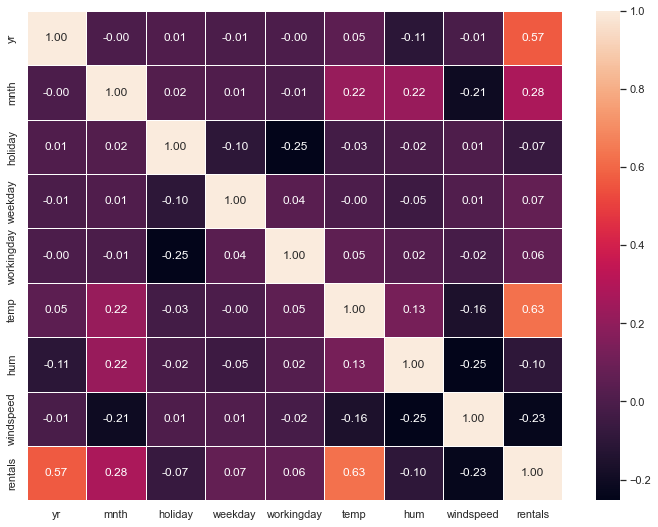

In [57]:
#Commencing EDA, I'm gonna drop "dteday" immidietly
dfB = pd.read_excel("bike_data.xlsx")
dfB = dfB.drop('dteday', axis = 1)

plt.subplots(figsize=(12,9))
sns.heatmap(dfB.corr(),annot=True, fmt = '.2f', linewidths= 0.5)

In [58]:
dfB

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals
0,winter,0,1,0,6,0,clouds,14.110847,80.5833,10.749882,985
1,winter,0,1,0,0,0,clouds,14.902598,69.6087,16.652113,801
2,winter,0,1,0,1,1,clear,8.050924,43.7273,16.636703,1349
3,winter,0,1,0,2,1,clear,8.200000,59.0435,10.739832,1562
4,winter,0,1,0,3,1,clear,9.305237,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,winter,1,12,0,4,1,clouds,10.420847,65.2917,23.458911,2114
727,winter,1,12,0,5,1,clouds,10.386653,59.0000,10.416557,3095
728,winter,1,12,0,6,0,clouds,10.386653,75.2917,8.333661,1341
729,winter,1,12,0,0,0,clear,10.489153,48.3333,23.500518,1796


In [59]:
#Here I setup my encoders
dumB = pd.get_dummies(dfB.weathersit, prefix='weather')
dummB = pd.get_dummies(dfB.season, prefix='season')

dfB= dfB.drop('weathersit', axis =1)
dfB= dfB.drop('season', axis =1)


#One hot encoding weather
dfB['wClouds'] =dumB['weather_clouds']
dfB['wclear'] =dumB['weather_clear']
dfB['wLight'] =dumB['weather_light']                


#One hot encoding Season
dfB['sWinter'] =dummB['season_winter']
dfB['sSummer'] =dummB['season_summer']
dfB['sSpring'] =dummB['season_spring']
dfB['sFall'] =dummB['season_fall']






In [60]:
#Here I will normalize my data
from sklearn.preprocessing import MinMaxScaler

minMax= MinMaxScaler()

minMax.fit(dfB)

scaled = minMax.fit_transform(dfB)

dfB = pd.DataFrame(scaled, columns = dfB.columns)

display(dfB)


,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,rentals,wClouds,wclear,wLight,sWinter,sSummer,sSpring,sFall
0,0.0,0.0,0.0,1.000000,0.0,0.355170,0.828620,0.284606,0.110792,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.379232,0.715771,0.466215,0.089623,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.166667,1.0,0.171000,0.449638,0.465740,0.152669,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.333333,1.0,0.175530,0.607131,0.284297,0.177174,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.500000,1.0,0.209120,0.449313,0.339143,0.181546,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,0.0,0.666667,1.0,0.243025,0.671380,0.675656,0.240681,1.0,0.0,0.0,1.0,0.0,0.0,0.0
727,1.0,1.0,0.0,0.833333,1.0,0.241986,0.606684,0.274350,0.353543,1.0,0.0,0.0,1.0,0.0,0.0,0.0
728,1.0,1.0,0.0,1.000000,0.0,0.241986,0.774208,0.210260,0.151749,1.0,0.0,0.0,1.0,0.0,0.0,0.0
729,1.0,1.0,0.0,0.000000,0.0,0.245101,0.497001,0.676936,0.204096,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [61]:
#Here I will do my split for testing
X= dfB.drop('rentals', axis=1)
y= dfB['rentals']


#Gonna do my train/test split
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.3)

#Dsiplay both for a good check
display(trainX)
display(trainY)

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,wClouds,wclear,wLight,sWinter,sSummer,sSpring,sFall
4,0.0,0.000000,0.0,0.500000,1.0,0.209120,0.449313,0.339143,0.0,1.0,0.0,1.0,0.0,0.0,0.0
244,0.0,0.727273,0.0,0.833333,1.0,0.727945,0.747643,0.242309,1.0,0.0,0.0,0.0,1.0,0.0,0.0
112,0.0,0.272727,0.0,1.000000,0.0,0.499503,0.913025,0.429490,1.0,0.0,0.0,0.0,0.0,1.0,0.0
122,0.0,0.363636,0.0,0.333333,1.0,0.694718,0.716795,0.660264,1.0,0.0,0.0,0.0,0.0,1.0,0.0
457,1.0,0.272727,0.0,0.166667,1.0,0.466998,0.518610,0.597329,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,1.0,0.181818,0.0,0.000000,0.0,0.332325,0.414738,0.643574,0.0,1.0,0.0,1.0,0.0,0.0,0.0
325,0.0,0.909091,0.0,0.333333,1.0,0.445508,0.989717,0.198734,0.0,0.0,1.0,0.0,0.0,0.0,1.0
275,0.0,0.818182,0.0,0.166667,1.0,0.405012,0.782348,0.125660,1.0,0.0,0.0,0.0,0.0,0.0,1.0
177,0.0,0.454545,0.0,0.166667,1.0,0.776749,0.676949,0.175637,1.0,0.0,0.0,0.0,1.0,0.0,0.0


4      0.181546
244    0.541302
112    0.461804
122    0.509549
457    0.680396
         ...   
428    0.391279
325    0.182352
275    0.408191
177    0.539116
102    0.246203
Name: rentals, Length: 511, dtype: float64

In [62]:

#Here I will train my model
size =  len(trainX.columns)

#establish model
mod =keras.models.Sequential()

#input layer
mod.add(keras.Input(shape=(size,)))

#Hidden layer
mod.add(keras.layers.Dense(int(size+.66), activation='relu'))

#output layer
mod.add(keras.layers.Dense(1))


#summary
mod.summary()

#compile!
mod.compile(loss = "mean_squared_error",optimizer = "adam", metrics= ['mse'])

#And fit!
logHistory = mod.fit(trainX, trainY,epochs=20, batch_size=1, verbose=1)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 15)                240       
                                                                 
 dense_32 (Dense)            (None, 1)                 16        
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
511/511 [==============================] - 1s 2ms/step - loss: 0.1395 - mse: 0.1395
Epoch 2/20
511/511 [==============================] - 1s 2ms/step - loss: 0.0239 - mse: 0.0239
Epoch 3/20
511/511 [==============================] - 1s 1ms/step - loss: 0.0162 - mse: 0.0162
Epoch 4/20
511/511 [==============================] - 1s 2ms/step - loss: 0.0134 - mse: 0.0134
Epoch 5/20
511/511 [==============================] - 1s 2ms/step - los

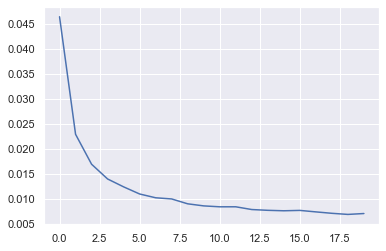

In [50]:

plt.plot(logHistory.history['mse'])
plt.show()


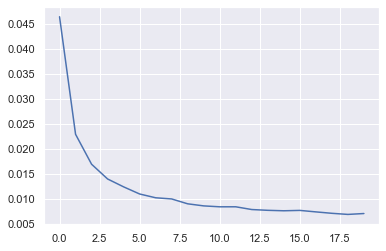

In [51]:
plt.plot(logHistory.history['loss'])
plt.show()

## Part 3 - Extra Credit (10 pts for exams)

Consider the diabetes dataset (diabetes.csv) used to predict diabetes (outcome) based on other features. 

Use the dataset to investigate and discuss **only one** of the following investigations:
1. impact of the number number of neurons in the hidden layer
1. impact of extra hidden layers
1. how to combat overfitting in deep neural networks

In [63]:
dfD = pd.read_csv("diabetes.csv")
dfD.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

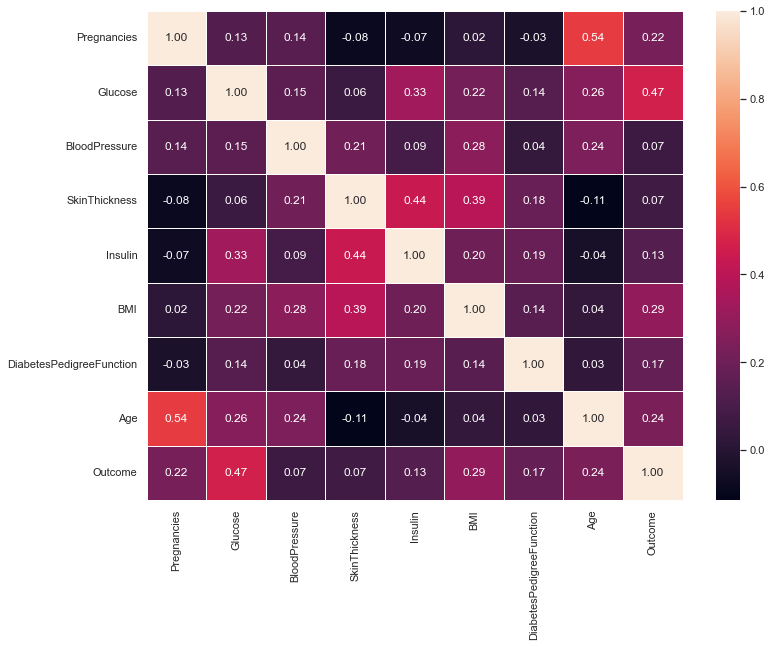

In [64]:
#Commencing EDA
plt.subplots(figsize=(12,9))
sns.heatmap(dfD.corr(),annot=True, fmt = '.2f', linewidths= 0.5)

### Observations
- Both pregnancy and age are highly coorolated. I'm going to drop pregnancies, because it will also heavily depend on gender which isn't accounted for in this dataset. I believe if I'm keeping one of them, age will give me more information.

- Insulin and skin thickness are also highly coorolated so I will choose insulin to keep. Though I think it really could be either.

<AxesSubplot:>

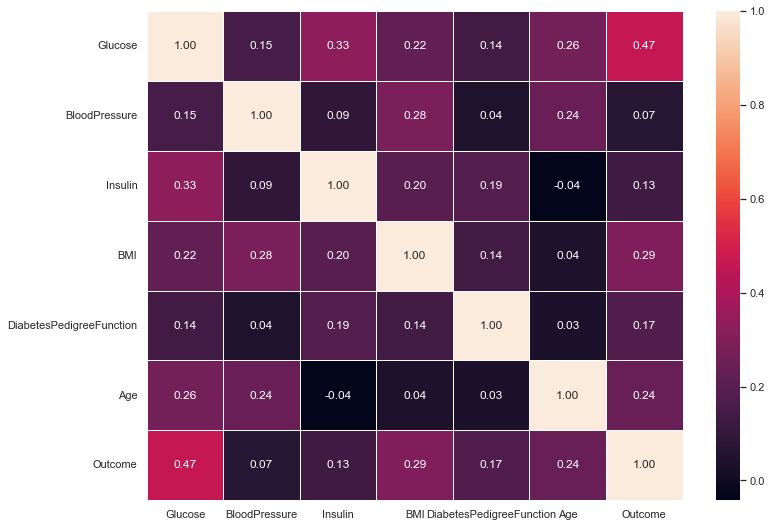

In [65]:
#Here I drop those 2
dfD=dfD.drop('Pregnancies', axis =1)
dfD= dfD.drop('SkinThickness', axis =1)

#We will see the heatmap again
plt.subplots(figsize=(12,9))
sns.heatmap(dfD.corr(),annot=True, fmt = '.2f', linewidths= 0.5)


### Reflection on Selection
- I believe droping those two variables helped a lot. Glucose is still highly corrolated, but it is with our target variable so that's fine.

In [66]:
#One hot encoding shouldn't be needed for this dataset so I can skip right to training the model
dfD.head()

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,0,33.6,0.627,50,1
1,85,66,0,26.6,0.351,31,0
2,183,64,0,23.3,0.672,32,1
3,89,66,94,28.1,0.167,21,0
4,137,40,168,43.1,2.288,33,1


In [97]:
#Here I will train my model
size =  len(trainX.columns)
print( len(trainX.columns))
mod = Sequential() 

# Add an input layer 
mod.add(Dense(size+1, activation='relu', input_shape=(size,)))

# Add one hidden layer 
mod.add(Dense(int(4), activation='relu'))

# Add an output layer 
mod.add(Dense(1, activation='sigmoid'))

mod.summary()

15
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                256       
                                                                 
 dense_73 (Dense)            (None, 4)                 68        
                                                                 
 dense_74 (Dense)            (None, 1)                 5         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [98]:
mod2 = Sequential() 

# Add an input layer 
mod2.add(Dense(size+1, activation='relu', input_shape=(size,)))

# Add one hidden layer 
mod2.add(Dense(int(4), activation='relu'))
mod2.add(Dense(int(4), activation='relu'))
mod2.add(Dense(int(4), activation='relu'))
mod2.add(Dense(int(4), activation='relu'))

# Add an output layer 
mod2.add(Dense(1, activation='sigmoid'))

mod2.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 16)                256       
                                                                 
 dense_76 (Dense)            (None, 4)                 68        
                                                                 
 dense_77 (Dense)            (None, 4)                 20        
                                                                 
 dense_78 (Dense)            (None, 4)                 20        
                                                                 
 dense_79 (Dense)            (None, 4)                 20        
                                                                 
 dense_80 (Dense)            (None, 1)                 5         
                                                                 
Total params: 389
Trainable params: 389
Non-trainable

In [99]:
keras.optimizers.Adam(learning_rate=0.001)

mod.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
logHistory = mod.fit(trainX, trainY,epochs=20, batch_size=1, verbose=0)


In [100]:
keras.optimizers.Adam(learning_rate=0.001)

mod2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
logHistory2 = mod2.fit(trainX, trainY,epochs=20, batch_size=1, verbose=0)

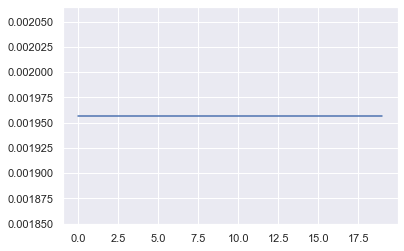

In [101]:

plt.plot(logHistory.history['accuracy'])
plt.show()



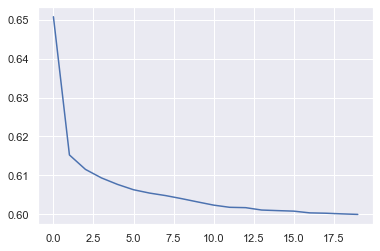

In [102]:
plt.plot(logHistory.history['loss'])
plt.show()

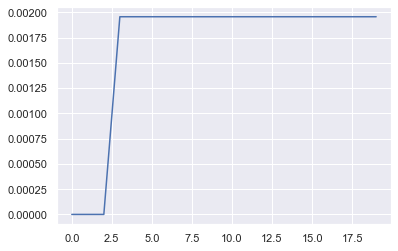

In [103]:
plt.plot(logHistory2.history['accuracy'])
plt.show()

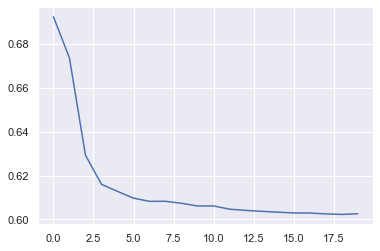

In [104]:
plt.plot(logHistory2.history['loss'])
plt.show()

### Observations
- The higher number of hidden layers led to increased accuracy, though it was more resource intensive 
- The loss rate aslo never droped to 0.60 with multiple hidden layers. It had a much sharper curve.